In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal 
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
sns.set(font='IPAexGothic')
from matplotlib.backends.backend_pdf import PdfPages #pdfで保存する

In [2]:
# ファイルの読み込み
df = pd.read_csv('debutanizer_data.csv')

# 目的変数の測定誤差を考慮
df['y'] = df['y'].shift(5)

#yがnanとなる期間のデータを削除
df = df.dropna()

#インデックスをリセット
df = df.reset_index(drop=True)

In [3]:
#3シグマ法
df_3sigma = df[abs(df - df.mean()) < 3 * df.std()]
df_outliers_3sigma = df[abs(df - df.mean()) > 3 * df.std()]

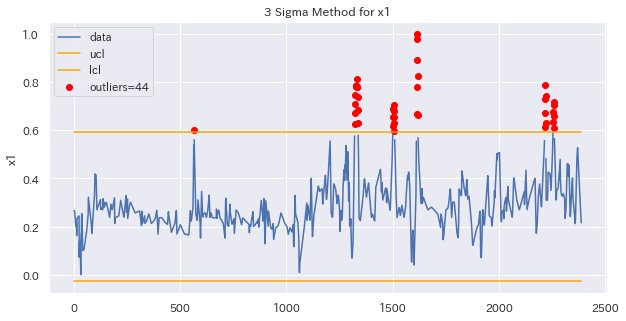

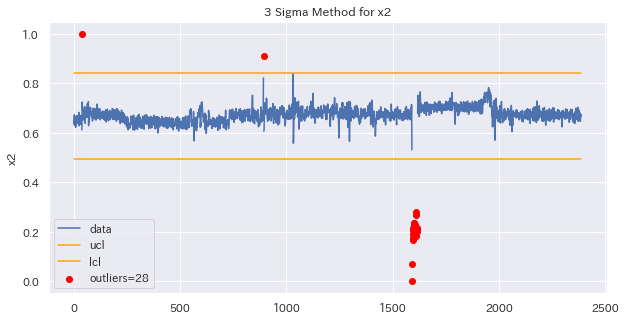

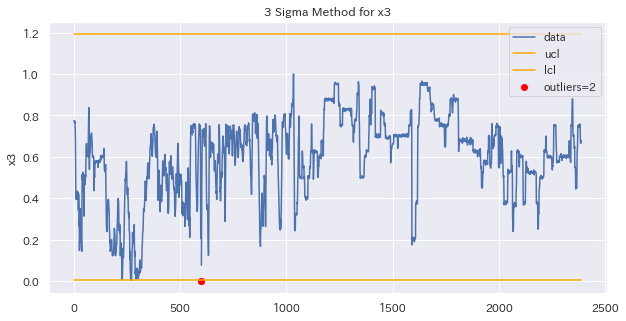

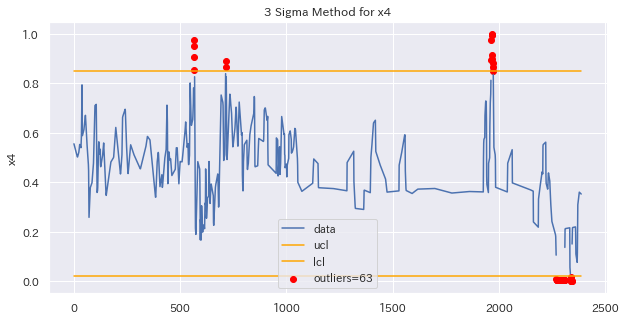

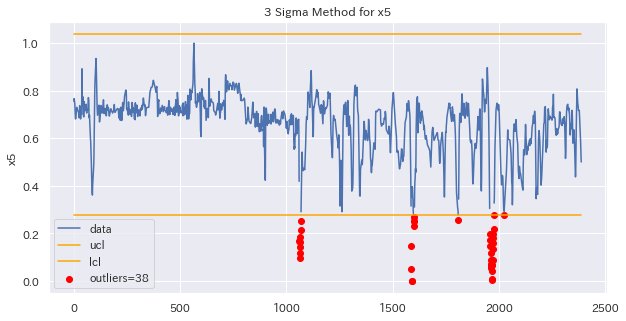

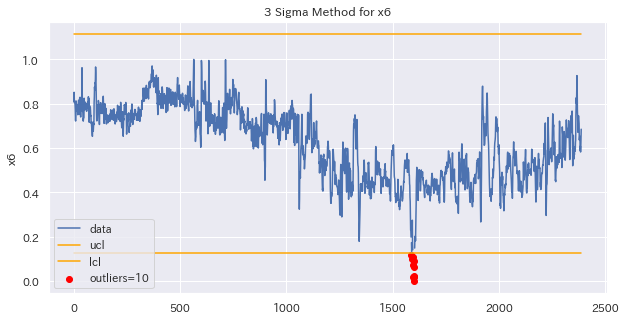

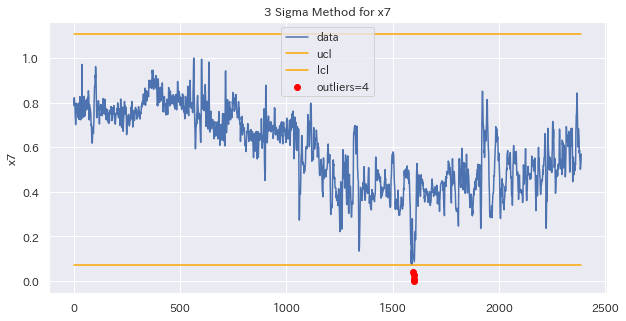

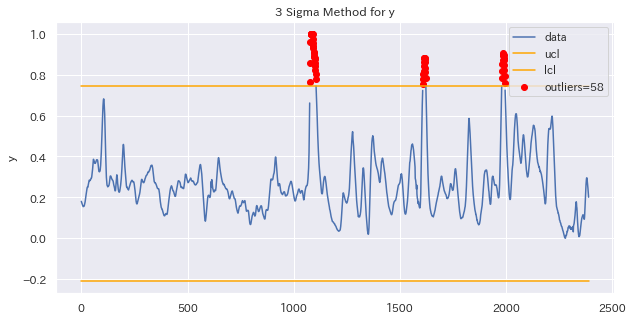

In [4]:
# 3シグマ法
# データフレームdfから上限制御線（UCL）と下限制御線（LCL）を計算します。
# UCLは平均値プラス3倍の標準偏差で、LCLは平均値マイナス3倍の標準偏差で計算されます。
ucl = df.mean() + 3 * df.std()
lcl = df.mean() - 3 * df.std()

# 次に、データフレームdf内のすべての値がUCLとLCLの間にあるデータ（外れ値を除去したデータ）を選択します。
df_3sigma = df[(df > lcl) & (df < ucl)]

# UCLまたはLCLを超える値（外れ値）も選択します。
df_outliers_3sigma = df[(df > ucl) | (df < lcl)]

# PdfPagesを使ってグラフをPDFに保存します。
pdf = PdfPages('debutanizer_3sigma.pdf')

# df内の各列に対して、次の処理を行います。
for col in df.columns:
    # 外れ値の数を数えます。
    outliers_number = df_outliers_3sigma[col].notna().sum()

    # matplotlibを使ってデータをプロットします。
    fig, ax = plt.subplots(figsize=(10,5))
    
    # 元のデータを青色の線でプロットします。
    ax.plot(df_3sigma[col], label='data')
    
    # 外れ値を赤色の点でプロットします。
    ax.scatter(df_outliers_3sigma.index, df_outliers_3sigma[col], c='red', label=f'outliers={outliers_number}')
    
    # UCLとLCLを橙色の線でプロットします。今回はデータの最小と最大インデックスに合わせてx軸を調整します。
    ax.plot([df_3sigma[col].index.min(), df_3sigma[col].index.max()], [ucl[col], ucl[col]], c='orange', label='ucl')
    ax.plot([df_3sigma[col].index.min(), df_3sigma[col].index.max()], [lcl[col], lcl[col]], c='orange', label='lcl')
    
    # Y軸のラベルを設定します。
    ax.set_ylabel(col)
    
    # 凡例をプロットします。
    ax.legend(loc='best')
    
    # タイトルを設定します
    ax.set_title(f'3 Sigma Method for {col}')

    # グラフをPNG画像として保存します。ファイル名は現在の列名に依存します。
    fig.savefig(f'{col}_3sigma.png', dpi=150)
    
    # グラフをPDFとして保存します。
    pdf.savefig(fig)
    
    # グラフを表示します。
    plt.show()
    
    # メモリを節約するために、作成したグラフを閉じます。
    plt.close(fig)
# すべてのグラフを描画し終えたら、PDFを閉じて保存します。
pdf.close() 

In [5]:
# Hampel Identifier
# データフレームdfの各値がその列の中央値からどの程度離れているかを計算します。
diff = abs(df - df.median())

# MADを計算します。
mad = 1.4826 * diff.median()

# 中央値から3 * MADを超える値（外れ値）を除去し、新しいデータフレームdf_hampel_を作成します。
df_hampel = df[abs(df - df.median()) < 3 * mad]

# 中央値から3 * MADを超える値（外れ値）だけを取り出し、新しいデータフレームdf_outliers_hampel_を作成します。
df_outliers_hampel = df[abs(df - df.median()) > 3 * mad]

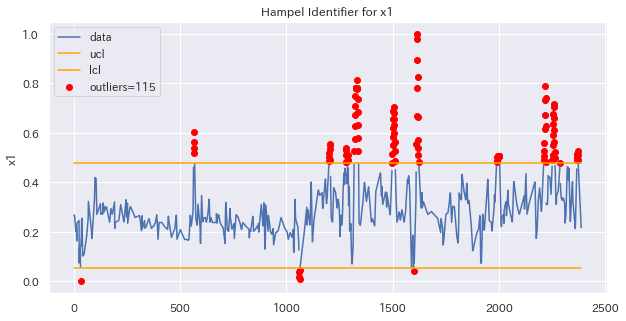

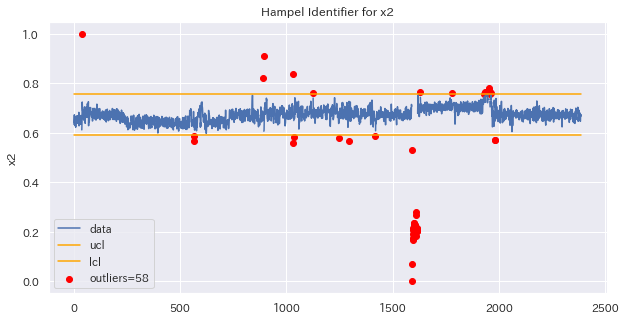

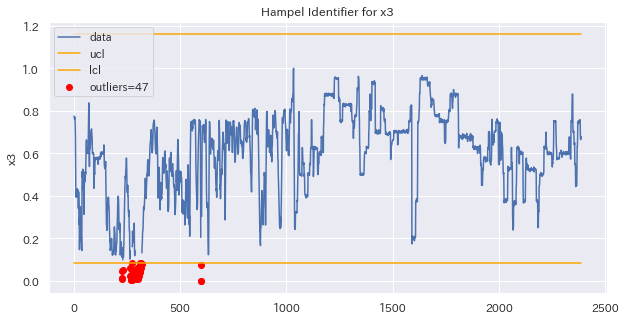

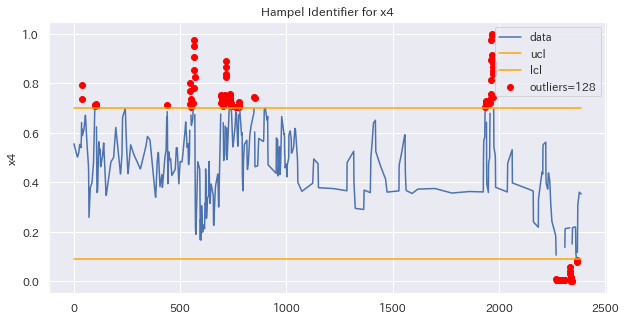

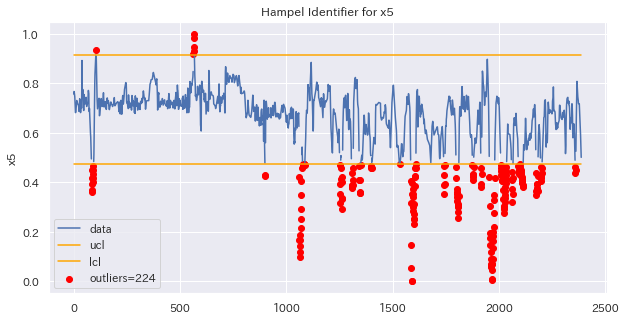

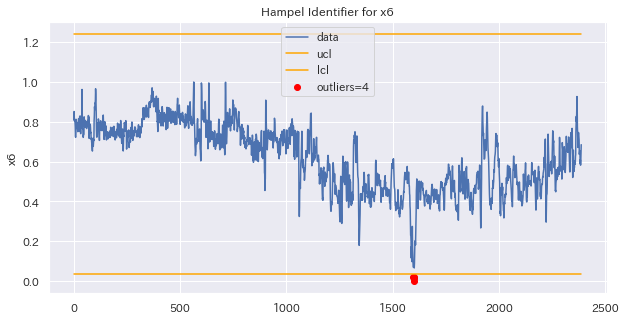

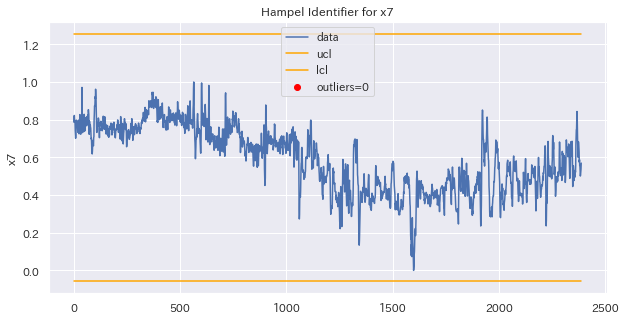

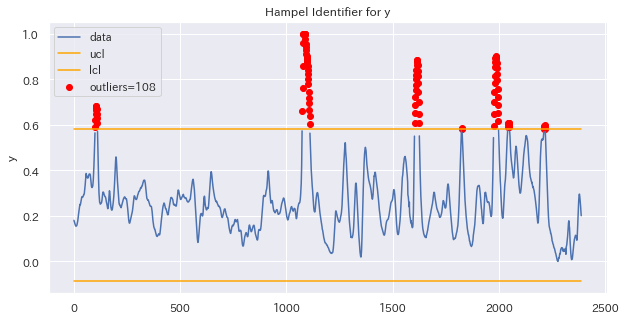

In [6]:
# Hampel Identifier
diff = abs(df - df.median())
mad = 1.4826*diff.median()

# データフレームdfから上限制御線（UCL）と下限制御線（LCL）を計算します。
ucl = df.median() + 3 * mad
lcl = df.median() - 3 * mad

# 次に、データフレームdf内のすべての値がUCLとLCLの間にあるデータ（外れ値を除去したデータ）を選択します。
df_hampel = df[(df > lcl) & (df < ucl)]

# UCLまたはLCLを超える値（外れ値）も選択します。
df_outliers_hampel = df[(df > ucl) | (df < lcl)]

# PdfPagesを使ってグラフをPDFに保存します。
pdf = PdfPages('debutanizer_hampel.pdf')

# df内の各列に対して、次の処理を行います。
for col in df.columns:
    # 外れ値の数を数えます。
    outliers_number = df_outliers_hampel[col].notna().sum()

    # matplotlibを使ってデータをプロットします。
    fig, ax = plt.subplots(figsize=(10,5))
    
    # 元のデータを青色の線でプロットします。
    ax.plot(df_hampel[col], label='data')
    
    # 外れ値を赤色の点でプロットします。
    ax.scatter(df_outliers_hampel.index, df_outliers_hampel[col], c='red', label=f'outliers={outliers_number}')
    
    # UCLとLCLを橙色の線でプロットします。今回はデータの最小と最大インデックスに合わせてx軸を調整します。
    ax.plot([df_hampel[col].index.min(), df_hampel[col].index.max()], [ucl[col], ucl[col]], c='orange', label='ucl')
    ax.plot([df_hampel[col].index.min(), df_hampel[col].index.max()], [lcl[col], lcl[col]], c='orange', label='lcl')
    
    # Y軸のラベルを設定します。
    ax.set_ylabel(col)
    
    # 凡例をプロットします。
    ax.legend(loc='best')
    
    # タイトルを設定します
    ax.set_title(f'Hampel Identifier for {col}')
    
    # グラフをPNG画像として保存します。ファイル名は現在の列名に依存します。
    fig.savefig(f'{col}_hampel.png', dpi=150)
    
    # グラフをPDFとして保存します。
    pdf.savefig(fig)
    
    # グラフを表示します。
    plt.show()
    
    # メモリを節約するために、作成したグラフを閉じます。
    plt.close(fig)
# すべてのグラフを描画し終えたら、PDFを閉じて保存します。
pdf.close() 

In [7]:
# 各列に対する'best_window_length'と'best_polyorder'の値
window_length = [71, 71, 71, 71, 71, 71, 71, 71]
polyorder = [1, 1, 1, 1, 1, 1, 1, 1]

# パラメータDataFrameの作成
df_param = pd.DataFrame(index=['best_window_length', 'best_polyorder'], columns=df.columns)
df_param.loc['best_window_length', :] = window_length
df_param.loc['best_polyorder', :] = polyorder

In [8]:
# 平滑化されたデータ用の空のDataFrameを作成
df_sg = pd.DataFrame(index=df.index)

# 各列データを平滑化して、結果をdf_sgに格納
for col in df.columns:
    df_sg[col] = signal.savgol_filter(df[col], window_length=df_param.loc['best_window_length', col], polyorder=df_param.loc['best_polyorder', col])

In [9]:
# 平滑化前後の差分
delta_df = abs(df - df_sg)

# Hampel Identifierの適用
delta_diff = abs(delta_df - delta_df.median())
mad = 1.4826 * delta_diff.median()
cl = delta_df.median() + 3 * mad
delta_new = delta_df[delta_diff < 3 * mad]
delta_outliers = delta_df[delta_diff > 3 * mad]

# 新しいデータフレームを作成して平滑化データと外れ値を格納
df_sg_hampel = pd.DataFrame(index=delta_new.index)
df_outliers_sg_hampel = pd.DataFrame(index=delta_outliers.index)
for col in delta_new.columns:
    df_index = delta_new[col].dropna().index
    outlier_index = delta_outliers[col].dropna().index
    df_sg_hampel[col] = df[col].loc[df_index]
    df_outliers_sg_hampel[col] = df[col].loc[outlier_index]

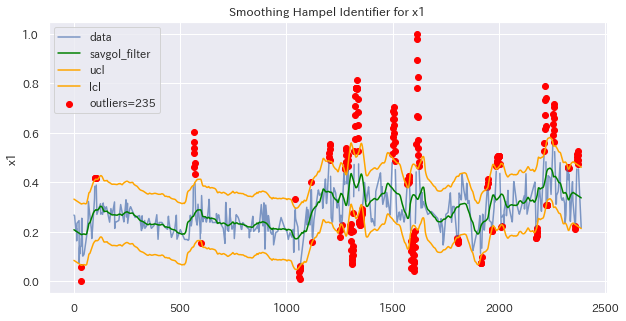

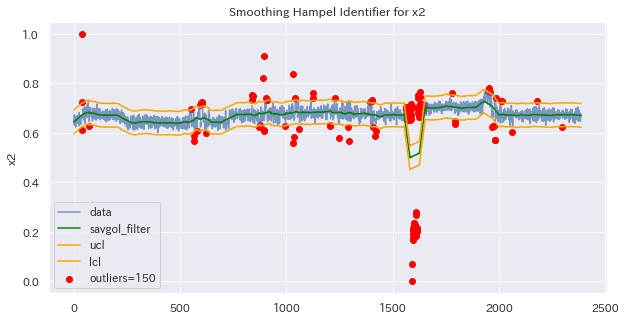

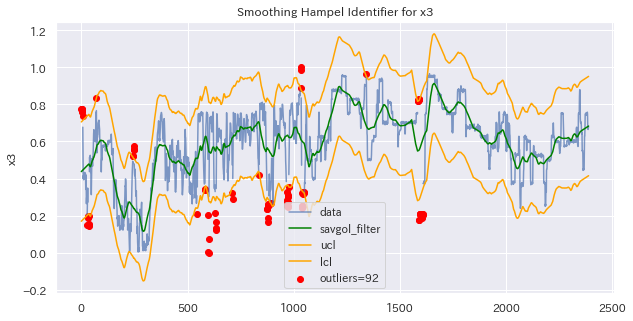

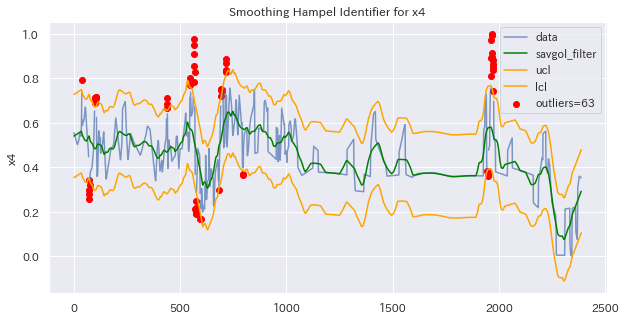

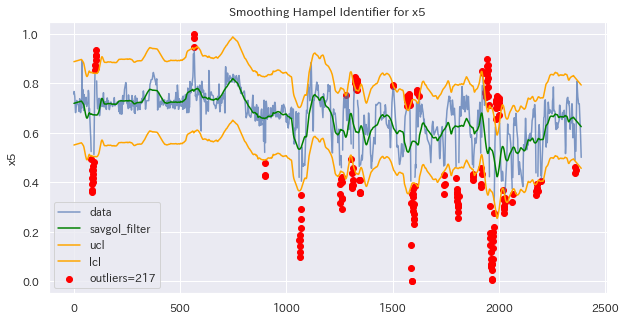

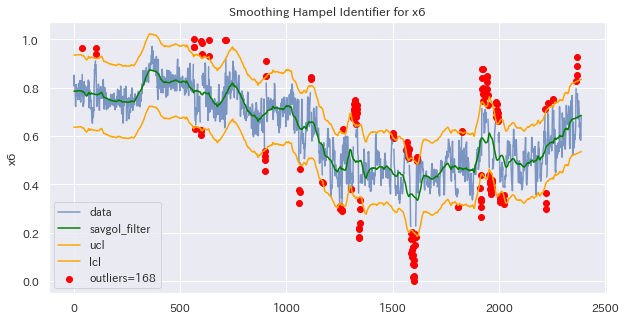

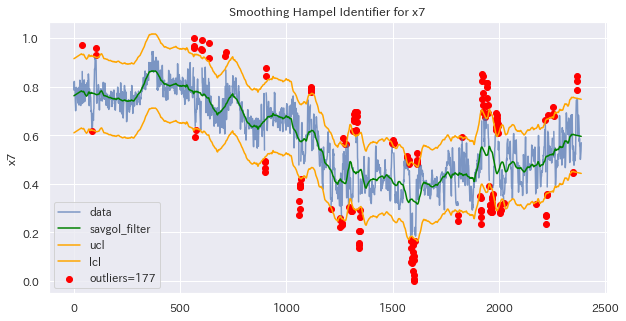

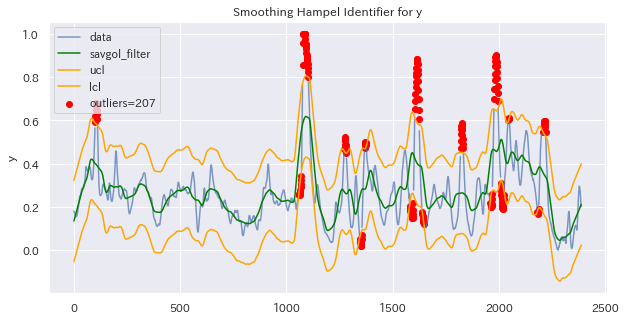

In [10]:
# PDFの保存先を設定します。
pdf = PdfPages('debutanizer_sg_hampel.pdf')

# 各列のデータに対してプロットと分析を行います。
for col in df.columns:
    # 外れ値の数を計算します。
    outliers_number = df_outliers_sg_hampel[col].notna().sum()

    # グラフの設定
    fig, ax = plt.subplots(figsize=(10,5))
    
    # 元のデータをプロット
    ax.plot(df_sg_hampel[col], alpha=0.7, label='data')
    
    # 平滑化データをプロット
    ax.plot(df_sg[col], c='green', label='savgol_filter')
    
    # 外れ値を赤色でプロット
    ax.scatter(df_outliers_sg_hampel.index, df_outliers_sg_hampel[col], c='red', label=f'outliers={outliers_number}')
    
    # UCLとLCLを橙色でプロット
    ax.plot(df_sg[col].index, df_sg[col] + cl[col], c='orange', label='ucl')
    ax.plot(df_sg[col].index, df_sg[col] - cl[col], c='orange', label='lcl')
    
    # Y軸のラベル、凡例、タイトルの設定
    ax.set_ylabel(col)
    ax.legend(loc='best')
    ax.set_title(f'Smoothing Hampel Identifier for {col}')
    
    # PNGとして保存
    fig.savefig(f'{col}_sg_hampel.png', dpi=150)
    
    # PDFに追加
    pdf.savefig(fig)
    
    # グラフの表示
    plt.show()
    
    # グラフの閉じる（メモリ節約）
    plt.close(fig)
# PDFを閉じて保存
pdf.close()